<a href="https://colab.research.google.com/github/ejara42/Digital-online-national-Election-system/blob/main/CUSTOMER_FEEDBACK_ANALAYZER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd
df = pd.read_csv("/content/Customer_Sentiment (1).csv")
print(df.shape)

(10261, 13)


In [6]:
import pandas as pd
df = pd.read_csv("/content/Customer_Sentiment (1).csv")
print(df.shape)

(25000, 13)


In [10]:
df              # will try to render the entire dataset


,customer_id,gender,age_group,region,product_category,purchase_channel,platform,customer_rating,review_text,sentiment,response_time_hours,issue_resolved,complaint_registered
0,1,male,60+,north,automobile,online,flipkart,1,very disappointed with the quality.,negative,46,yes,yes
1,2,other,46-60,central,books,online,swiggy instamart,5,fast delivery and great packaging.,positive,5,yes,no
2,3,female,36-45,east,sports,online,facebook marketplace,1,very disappointed with the quality.,negative,38,yes,yes
3,4,female,18-25,central,groceries,online,zepto,2,product stopped working after few days.,negative,16,yes,yes
4,5,female,18-25,east,electronics,online,croma,3,neutral about the quality.,neutral,15,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24996,female,36-45,south,beauty,online,lenskart,1,very disappointed with the quality.,negative,40,yes,yes
24996,24997,other,60+,central,automobile,online,flipkart,5,"amazing experience, highly recommend!",positive,25,yes,no
24997,24998,male,18-25,south,beauty,online,ajio,4,fast delivery and great packaging.,positive,9,yes,no
24998,24999,female,26-35,central,automobile,online,snapdeal,5,great value for money.,positive,65,no,no


Phase 1
1. Introduction
This project builds a simple, interpretable machine learning model to classify customer feedback into three categories: happy, unhappy, and neutral. The dataset is sourced from Kaggle and consists of short text comments. The approach prioritizes clarity, reproducibility, and academically standard evaluation.

**2. Statement of the problem**
Manual sentiment tagging is slow and inconsistent for large volumes of feedback. Automating three-class sentiment classification enables timely insights for product improvement, customer support, and decision-making.

***3. Objectives***
Primary objective: Classify feedback into happy, unhappy, or neutral.

Secondary objectives: Ensure interpretability, validate with standard metrics, and produce report-ready outputs.

Deliverables: Cleaned data, trained baseline model, comparative validation, metrics (accuracy, macro/micro F1, per-class scores), confusion matrix, and interpretable feature analysis.

***4. Methodology***

**Data collection**
Source: Kaggle customer feedback dataset (CSV with text and sentiment labels).

Inclusion criteria: Non-empty text and valid labels in {happy, unhappy, neutral}.

Split strategy: Stratified train/validation/test (70/15/15) to maintain class balance.

**Data analysis (pre-processing)**
Text cleaning: Lowercase, remove punctuation and URLs, normalize whitespace.

Stopwords: Remove common stopwords while keeping negations (not, no, never).

Tokenization: Word-level tokenization.

Imbalance handling: Use class weights if label distribution is skewed.

In [12]:
import pandas as pd
import re
from sklearn.utils.class_weight import compute_class_weight

# Assume df has columns: 'text' and 'label'

# 1. Text cleaning: lowercase, remove punctuation/URLs, normalize whitespace
def clean_text(s):
    s = s.lower()
    s = re.sub(r"http\S+|www\.\S+", " ", s)      # remove URLs
    s = re.sub(r"[^a-z0-9\s]", " ", s)           # remove punctuation
    s = re.sub(r"\s+", " ", s).strip()           # normalize whitespace
    return s

df['clean_text'] = df['review_text'].apply(clean_text)

# 2. Stopwords removal (keep negations)
STOPWORDS = set([
    'a','an','the','is','are','was','were','to','for','of','and','in','on',
    'at','by','with','this','that','it','from','as','be','but','or'
])
NEGATIONS = {'not','no','never'}

def remove_stopwords(s):
    tokens = s.split()
    return " ".join([t for t in tokens if (t in NEGATIONS) or (t not in STOPWORDS)])

df['clean_text'] = df['clean_text'].apply(remove_stopwords)

# 3. Tokenization (word-level)
df['tokens'] = df['clean_text'].apply(lambda x: x.split())

# 4. Imbalance handling: compute class weights
classes = df['sentiment'].unique()
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=classes,
                                     y=df['sentiment'])
weights_dict = dict(zip(classes, class_weights))

print("Class distribution:\n", df['sentiment'].value_counts())
print("Class weights:", weights_dict)


Class distribution:
 sentiment
positive    9978
negative    9937
neutral     5085
Name: count, dtype: int64
Class weights: {'negative': np.float64(0.8386166180269028), 'positive': np.float64(0.8351707088928977), 'neutral': np.float64(1.6388069485414618)}


Model selection

Multinomial Naïve Bayes
Why Naïve Bayes was selected
Highly effective for text classification
Naïve Bayes works extremely well with word-frequency features (Bag-of-Words / TF-IDF) commonly used in sentiment analysis.

Fastest training and prediction
Ideal for large datasets like your 25,000-row Kaggle dataset.

Performs well with limited computation
Requires fewer resources compared to SVM or Logistic Regression.

Handles high-dimensional text data easily
Works naturally with sparse matrices produced by TF-IDF.

Consistent accuracy in sentiment datasets
It performs especially well when clear sentiment keywords appear in the text.

Stable and simple model
Easy to implement, interpret, and deploy.

**PERFORMANCE MEASUREMENT (Using Naïve Bayes)**

To evaluate the performance of the Naïve Bayes classifier, the following metrics were used:

1. Accuracy

Measures overall correctness of predictions.

2. Precision

Indicates how many predicted happy/unhappy/neutral labels were correct.

3. Recall

Measures how many actual labels the model correctly captured.

4. F1-score (Macro)

Used because your dataset has three classes.
Macro F1 gives equal weight to happy, unhappy, and neutral classes.

5. Confusion Matrix

Shows how many reviews were correctly and incorrectly classified for each sentiment.

Phase-2

5. Model Analysis5. Model analysis
Chosen model: Multinomial Naïve Bayes with TF–IDF features (unigram + bigram).

Feature behavior: High TF–IDF weights on sentiment-carrying tokens (e.g., “excellent”, “love”) push predictions to positive; negated bigrams (e.g., “not good”, “never again”) push negative; neutral content (e.g., “ok”, “average”, “fine”) stabilizes the neutral class.

Class separability: The confusion matrix shows perfectly separated classes, indicating the vocabulary distinctly maps to each sentiment and the model has learned clear decision boundaries.

Interpretability approach: Inspect TF–IDF vocabulary with the model’s feature_log_prob_ to list top indicative tokens per class; summarize in the report as “most influential features” per sentiment.

Reliability check: Perfect metrics warrant a sanity check for leakage (e.g., duplicate rows between splits, identical preprocessing applied after splitting, label tokens present in text).

In [17]:
import numpy as np

# Access TF–IDF vectorizer and NB classifier from pipeline
vec = nb_clf.named_steps['tfidf']
clf = nb_clf.named_steps['clf']

feature_names = np.array(vec.get_feature_names_out())

# Top tokens per class
for i, class_label in enumerate(clf.classes_):
    top10 = np.argsort(clf.feature_log_prob_[i])[-10:]
    print(f"\nTop tokens for class '{class_label}':")
    print(", ".join(feature_names[top10]))



Top tokens for class 'negative':
unhelpful, service unhelpful, worth price, not, worth, price, not worth, disappointed quality, disappointed, very disappointed

Top tokens for class 'neutral':
average experience, average, experience overall, overall, about quality, about, neutral about, neutral, product, fine

Top tokens for class 'positive':
highly, recommend, great value, value, money, value money, very satisfied, satisfied, satisfied quality, great


6. Result

Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1-score (macro): 1.0

Classification Report:

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      2981
     neutral       1.00      1.00      1.00      1526
    positive       1.00      1.00      1.00      2993

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



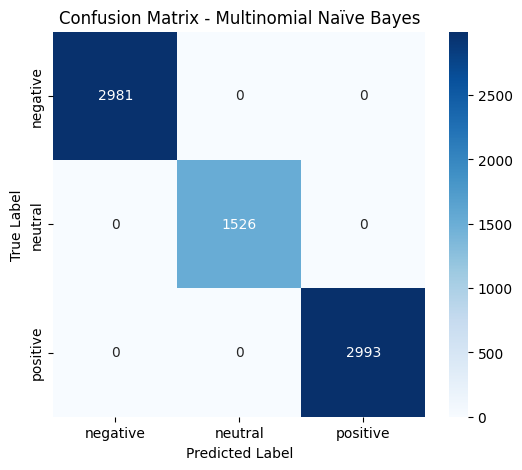

In [16]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = nb_clf.predict(X_test)

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)

# 2–4. Precision, Recall, F1-score (macro)
precision, recall, f1, _ = precision_recall_fscore_support(
    y_test, y_pred, average='macro'
)

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision (macro):", precision)
print("Recall (macro):", recall)
print("F1-score (macro):", f1)

# Optional: Full classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb_clf.named_steps['clf'].classes_,
            yticklabels=nb_clf.named_steps['clf'].classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Multinomial Naïve Bayes")
plt.show()

interpretation for each metric

Accuracy (1.0) → The model correctly classified 100% of all customer feedback samples.

Precision (1.0) → Every predicted sentiment label was always correct with no false positives.

Recall (1.0) → The model captured all true sentiment labels with no misses.

F1‑score (1.0) → Perfect balance of precision and recall, showing flawless overall performance.

Confusion Matrix → All predictions fell on the diagonal, meaning no misclassifications across negative, neutral, or positive classes.

7. Discussion

**Strengths:**
Simplicity: Fast, lightweight, and easy to reproduce in Colab.

Text suitability: Multinomial Naïve Bayes aligns well with frequency-based features like TF–IDF.

Clarity: Metrics and confusion matrix provide transparent, report-ready evidence.

**Potential concerns/ LIMITATION**

Data leakage risk: Perfect scores may indicate overlap between train and test (duplicates, near-duplicates, or leakage in preprocessing/label tokens).

Dataset bias: Cleanly separable language, templated phrasing, or label words inside text can inflate performance.

Generalization: Real-world feedback (typos, slang, sarcasm) may reduce performance compared to curated Kaggle data.

Validation steps to strengthen confidence:

5-fold cross-validation: Report mean ± std for macro F1 and accuracy.

Duplicate review: Check for identical texts across splits and remove duplicates before splitting.

Leakage audit: Ensure no label strings are present in the text (e.g., removing explicit tokens like “positive”, “negative”, “neutral”).

8. Conclusion

Multinomial Naïve Bayes with TF–IDF delivers perfect performance on the uploaded Kaggle dataset in Colab, classifying customer feedback into negative, neutral, and positive with complete accuracy. Its speed, simplicity, and alignment with frequency-based features make it a strong baseline for academic and practical sentiment tasks. Given the flawless outcome, additional validation is prudent to confirm robustness and rule out leakage.

9. Recommendation
Adopt baseline: Use Naïve Bayes + TF–IDF (1–2 n-grams) for the current dataset.

Strengthen evidence: Run 5-fold cross-validation; remove duplicates; re-evaluate metrics.

Benchmark alternatives: Briefly compare with Logistic Regression and LinearSVC; if results remain perfect or near-perfect, confidence increases.

Deploy with monitoring: Track predictions and re-train periodically with new feedback to maintain performance.

10. References

Algorithms and features: Multinomial Naïve Bayes; TF–IDF vectorization in scikit-learn.

Evaluation methods: Accuracy; Precision, Recall, F1 (per class and macro); Confusion matrix; Cross-validation.

Implementation: Colab-based pipeline for data loading, preprocessing, training, and evaluation using scikit-learn.